# Cifar10

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print('train_images shape:', X_train.shape)
print('train_labels shape:', y_train.shape)
print('test_images shape:', X_test.shape)
print('test_labels shape:', y_test.shape)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


In [3]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### VGG16 convolutional base 卷積基底

In [4]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',  
                  include_top=False,
                  input_shape=(32, 32, 3))

W0301 22:33:28.691122  3564 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0301 22:33:28.703913  3564 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0301 22:33:28.706912  3564 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0301 22:33:28.721916  3564 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0301 22:33:28.981974  3564 dep

In [5]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [6]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                             samplewise_center=False,  # set each sample mean to 0
                             featurewise_std_normalization=False,  # divide inputs by std of the dataset
                             samplewise_std_normalization=False,  # divide each input by its std
                             zca_whitening=False,  # apply ZCA whitening
                             rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)


model = models.Sequential()
model.add(conv_base)                   
model.add(layers.Flatten())            
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()  

model.compile(optimizer=optimizers.Adam(2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=64),
                                           steps_per_epoch=X_train.shape[0] // 64,
                                           epochs=30,
                                           validation_data=(X_test, y_test))

_________________________________________________________________

W0301 22:33:30.197123  3564 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0301 22:33:30.265138  3564 deprecation.py:323] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
781/781 [==============================] - 65s 83ms/step - loss: 0.9782 - acc: 0.6544 - val_loss: 0.7364 - val_acc: 0.7434
Epoch 2/30
781/781 [==============================] - 63s 80ms/step - loss: 0.6741 - acc: 0.7635 - val_loss: 0.6117 - val_acc: 0.7868
Epoch 3/30
781/781 [==============================] - 63s 8

In [7]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.5173803413689136
Test accuracy: 0.8754


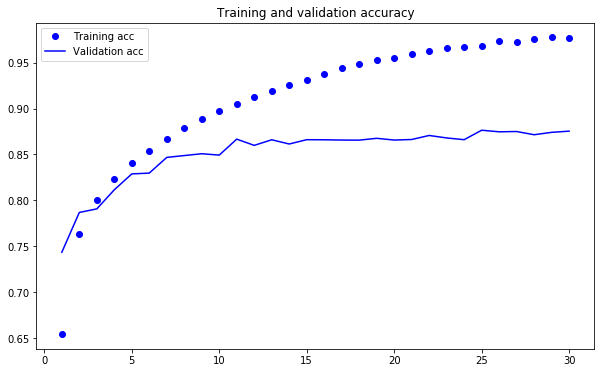

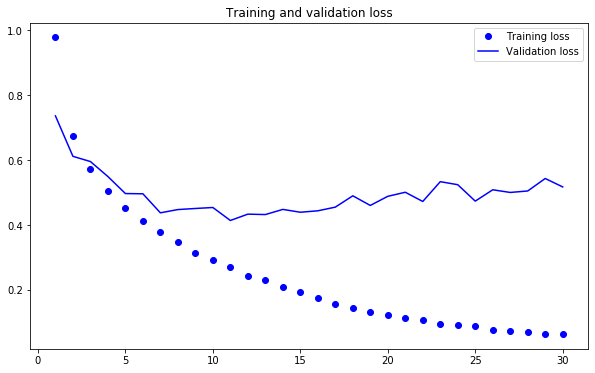

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 將所有層凍結到指定層為止

In [9]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

### 微調神經網路

In [10]:
model.summary()
model.compile(optimizer=optimizers.Adam(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=15),
                  keras.callbacks.ModelCheckpoint(filepath='VGG16.h5', monitor='val_loss', save_best_only=True)]
history = model.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=64),
                                           steps_per_epoch=X_train.shape[0] // 64,
                                           epochs=100,
                                           validation_data=(X_test, y_test),
                                           callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 22,483,850
Trainable params: 14,848,586
Non-trainable params: 7,635,264
_________________________________________________________________


C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/100
781/781 [==============================] - 34s 44ms/step - loss: 0.0069 - acc: 0.9977 - val_loss: 0.0936 - val_acc: 0.9766
Epoch 2/100
781/781 [==============================] - 34s 44ms/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0986 - val_acc: 0.9767
Epoch 3/100
781/781 [==============================] - 34s 43ms/step - loss: 0.0046 - acc: 0.9984 - val_loss: 0.1029 - val_acc: 0.9764
Epoch 4/100
781/781 [==============================] - 34s 43ms/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.1057 - val_acc: 0.9763
Epoch 5/100
781/781 [==============================] - 34s 43ms/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.1026 - val_acc: 0.9771
Epoch 6/100
781/781 [==============================] - 34s 43ms/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.1048 - val_acc: 0.9766
Epoch 7/100
781/781 [==============================] - 34s 43ms/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.1067 - val_acc: 0.9766
Epoch 8/100
781/781 [==============================] - 

In [11]:
model.load_weights("VGG16.h5")

In [12]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.09361088271066546
Test accuracy: 0.9765500038146973


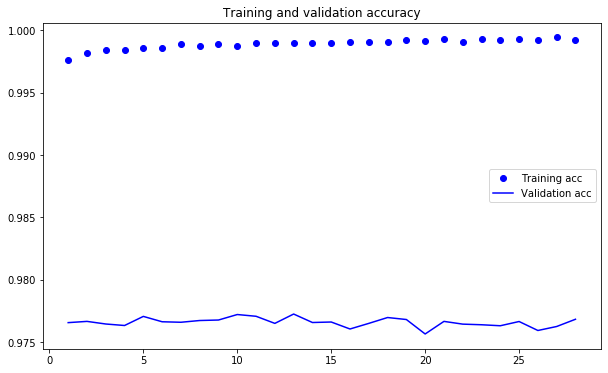

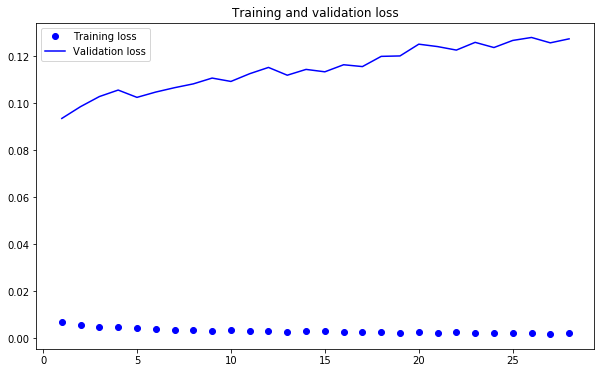

In [13]:
plt.rcParams['figure.figsize'] = (10, 6)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()